## Designing Smart and Healthy Systems, Heinz College, CMU, Pittsburgh
### HW 1: Exploratory Data Analysis and Data Preparation - Task 2; April 2020

#### Group 4: Batshur (Shuree) Gootiz, Sanjana Kotecha

In [1]:
# Imports required to load the datasets from S3 Bucket
import os
import boto3
from boto3 import client

# Additional imports required for the homework tasks
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing

In [2]:
bucketname = "cmu-dshs-diabetes-data"
s3 = boto3.resource('s3')
my_bucket = s3.Bucket(bucketname)
for my_bucket_object in my_bucket.objects.all():
    print(my_bucket_object)

s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='Balance - Tablas (Parte 1 ) pacientes.csv')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='Balance - Tablas (Parte 1 ).xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='Balance - Tablas (Parte 2 ).xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='Balance - Tablas (Parte 3 ).xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='DataDictionary version 2.xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='I Datos CMU (BAL).xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='II Datos CMU (BAL).xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='III Datos CMU (ENC).xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='IV Datos CMU (BAL).xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='notasevolucionpsic.csv')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='psicologiasesion1.csv')


In [3]:
# Using the client system in the boto3 
conn = client('s3')  
for key in conn.list_objects(Bucket=bucketname)['Contents']:
    print(key['Key'])

Balance - Tablas (Parte 1 ) pacientes.csv
Balance - Tablas (Parte 1 ).xlsx
Balance - Tablas (Parte 2 ).xlsx
Balance - Tablas (Parte 3 ).xlsx
DataDictionary version 2.xlsx
I Datos CMU (BAL).xlsx
II Datos CMU (BAL).xlsx
III Datos CMU (ENC).xlsx
IV Datos CMU (BAL).xlsx
notasevolucionpsic.csv
psicologiasesion1.csv


In [4]:
#Task 1: Testing some hypotheses on nutritional data are available in the II Datos file
filename = 'II Datos CMU (BAL).xlsx'
dataframe =  pd.ExcelFile('s3://{}/{}'.format(bucketname, filename))#, encoding = 'ISO-8859-1')

dataframe.sheet_names

['nutriciondietaspacientes',
 'nutricionevaluacionnutricional',
 'nutricionnotasseguimiento',
 'nutricionplanesnutricionales',
 'nutricionvaloracioninicial',
 'referenciasmedicas',
 'testaudit',
 'respaudit',
 'testcar',
 'respcar',
 'testfagestrom',
 'respfagestrom',
 'testhamilton',
 'resphamilton',
 'retinografias']

In [5]:
# Function to read the data from excel sheet
def read_data_from_excel(filename,sheetname):
    dataframe = pd.read_excel('s3://{}/{}'.format(bucketname, filename), sheetname, encoding = 'ISO-8859-1')
    return dataframe.copy()

# Function to read the data from csv file
def read_data_from_csv(filename):
    dataframe = pd.read_csv('s3://{}/{}'.format(bucketname, filename), encoding = 'ISO-8859-1')
    return dataframe.copy()

# Function to display basic data info
def display_basic_data(dataframe):
    #Get the first 5 rows of the CSV
    display(dataframe.head(5))
    dataframe.info()

In [6]:
filename = 'Balance - Tablas (Parte 1 ).xlsx'
dataframe =  pd.ExcelFile('s3://{}/{}'.format(bucketname, filename))#, encoding = 'ISO-8859-1')

dataframe.sheet_names

['agenda',
 'deteccioncomplicacionesma',
 'deteccioncomplicacionesre',
 'hc',
 'hc_hospitalizaciones',
 'historialcitascanceladas',
 'historialcitasagendadas',
 'pacientes',
 'paquetes',
 'periodosrecetas',
 'pr_razones',
 'prospectos']

In [7]:
filename = 'Balance - Tablas (Parte 1 ).xlsx'
sheetname = 'pacientes'
pacientes_df = read_data_from_excel(filename,sheetname)
pacientes_df.columns
#pacientes_df.head()

Index(['IdPaciente', 'AnioNacimiento', 'IdConsultorio', 'Ciudad', 'Estado',
       'Sexo', 'EstadoCivil', 'Religion', 'Ocupacion', 'Escolaridad', 'Fecha',
       'Hora', 'IdInteresado', 'ProgramaRecomendados', 'SeguridadSocial',
       'RecordarCita', 'EstadioValor', 'Estadio'],
      dtype='object')

In [8]:
filename = 'Balance - Tablas (Parte 2 ).xlsx'
dataframe =  pd.ExcelFile('s3://{}/{}'.format(bucketname, filename))#, encoding = 'ISO-8859-1')

dataframe.sheet_names

['prospectosseguimiento', 'psicologiasesion1']

In [9]:
filename = 'Balance - Tablas (Parte 2 ).xlsx'
sheetname = 'psicologiasesion1'
psychol_df = read_data_from_excel(filename,sheetname)
psychol_df.head()

,psicologiasesion1,IdPaciente,Fecha,Hora,TrastornosConductaAlimetaria,EtapaDuelo,EtapaDueloObservaciones,ApoyoSocialEmocional,ApoyoSocialEmocionalObservaciones,ApoyoInstrumental,...,Sesion4,Fecha4,Hora4,Psicoeducacion4,Emociones4,RazonesBuenMargenAzucar4,Autoestima4,usuario4,Motivacion,Sesion1
0,1,1,2012-12-01 00:00:00,10:30:00,0.0,IRA/FRUSTRACIÓN,EL PACIENTE QUE TIENE 12 AÑOS CON LA ENFERMEDA...,1.0,LA PRINCIPAL FUENTE DE APOYO EMOCIONAL DEL PAC...,1.0,...,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2,2,2011-11-30 00:00:00,11:00:00,0.0,NEGOCIACIÓN,EL PACIENTE YA QUE TIENE 12 AÑOS CON DIABETES....,1.0,EL PACIENTE SOLO MENCIONA COMO SU APOYO EMOCIO...,0.0,...,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3,3,2012-12-12 00:00:00,12:00:00,0.0,IRA/FRUSTRACIÓN,"SIENTE MUCHO ENOJO RESPECTO AL PADECIMIENTO, Y...",0.0,A PESAR DE QUE LA PACIENTE CUENTA CON SU ESPOS...,0.0,...,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4,4,2012-09-08 00:00:00,17:30:00,0.0,NEGACIÓN,"PACIENTE CON DM2 DESDE HACE UN AÑO, TRES MESES...",0.0,VIVE CON SUS PAPAS. SE CONSIDERA AUTOSUFICIENTE.,0.0,...,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,5,5,2011-12-15 00:00:00,11:00:00,0.0,DEPRESIÓN,EL PACIENTE SE LIMITA AL CONTROL DE LA ENFERM...,0.0,"NO SE SIENTE APOYADO EMOCIONALMENTE, ESPECIALM...",0.0,...,0.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [10]:
psychol_df.ApoyoSocialEmocional.unique()
psychol_df.describe()

,psicologiasesion1,IdPaciente,TrastornosConductaAlimetaria,ApoyoSocialEmocional,ApoyoInstrumental,NivelAnsiedad,Sesion2,Sesion3,Sesion4,Sesion1
count,8377.000000,8377.000000,8346.000000,8346.000000,8346.000000,0.0,8377.000000,8346.000000,8346.000000,8377.000000
mean,4190.148382,6926.945804,0.000120,0.866163,0.481428,NaN,0.310374,0.143781,0.079439,0.591501
std,2418.724723,4184.795232,0.010946,0.340497,0.499685,NaN,0.462674,0.350889,0.270439,0.491586
min,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,2096.000000,3463.000000,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
50%,4190.000000,6741.000000,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,1.000000
75%,6284.000000,10377.000000,0.000000,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,1.000000
max,9155.000000,14965.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000


In [11]:
filename = 'Balance - Tablas (Parte 1 ).xlsx'
sheetname = 'agenda'
agenda_df = read_data_from_excel(filename,sheetname)

In [12]:
#Slicing Nutrition appointments AND attended those appointments
options = ['NUTRICIÓN'] 
attended= ['ASISTIO']
  
# selecting rows based on condition 
nutrition_appts = agenda_df.loc[agenda_df['Area'].isin(options)]
nutrition_appts = nutrition_appts.loc[nutrition_appts['Asistencia'].isin(attended)]

In [13]:
nutrition_appts.head()

,IdAgenda,IdPaciente,Area,Fecha,Hora,FechaAlta,Asistencia,Razon,IdConsultorio,IdEstatusCita,ComoSeEnteroCitaAg
48,50,697.0,NUTRICIÓN,2013-01-08 00:00:00,09:00:43,0000-00-00,ASISTIO,CONSULTA MÉDICA,1,AGENDADA,NaN
102,104,656.0,NUTRICIÓN,2013-01-14 00:00:00,10:30:00,0000-00-00,ASISTIO,CONSULTA MÉDICA,1,AGENDADA,NaN
120,122,160.0,NUTRICIÓN,2013-01-15 00:00:00,11:00:58,0000-00-00,ASISTIO,CONTROL VITAL,1,AGENDADA,NaN
152,154,44.0,NUTRICIÓN,2013-01-17 00:00:00,11:30:29,0000-00-00,ASISTIO,INICIO DE PAQUETE,1,AGENDADA,NaN
156,158,462.0,NUTRICIÓN,2013-01-18 00:00:00,08:30:29,0000-00-00,ASISTIO,CONSULTA NUTRICIÓN,1,AGENDADA,NaN


In [14]:
nutrition_appts['Fecha'] = pd.to_datetime(nutrition_appts['Fecha'], errors = 'coerce')
nutrition_appts['year'], nutrition_appts['month'] = nutrition_appts['Fecha'].dt.year, nutrition_appts['Fecha'].dt.month

#Group by year and count number of appointments: Nutrition app attendance in TOTAL
grouped_nutrition =nutrition_appts.groupby(['IdPaciente'])[['IdAgenda']].count()
grouped_nutrition.rename(columns = {'IdAgenda':'nutrition_attended'}, inplace = True)

grouped_nutrition.info() #Total number of attendance in nutrition appts, there are 8918 rows of entries
grouped_nutrition.describe()
grouped_nutrition.head()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 7385 entries, 0.0 to 14870.0
Data columns (total 1 columns):
nutrition_attended    7385 non-null int64
dtypes: int64(1)
memory usage: 115.4 KB


,nutrition_attended
IdPaciente,
0.0,13
6.0,10
9.0,1
14.0,1
15.0,11


In [15]:
# Find all the sheets that are available in the I Datos Excel Sheet
filename = 'I Datos CMU (BAL).xlsx'
dataframe =  pd.ExcelFile('s3://{}/{}'.format(bucketname, filename))#, encoding = 'ISO-8859-1')

dataframe.sheet_names

['bitacoravisitas',
 'consultas',
 'controlvital',
 'C|escalawagner',
 'C|estatusdecisionprospecto',
 'C|estatusdesactivadopor',
 'C|estatusevaluacion',
 'C|estatusexpectativa_prospecto',
 'C|estatusfactoractividad',
 'C|estatusfundacion',
 'C|estatushipoglucemia',
 'C|estatustiporeferencia',
 'laboratorios',
 'laboratoriosotros',
 'notasevolucionpsic']

In [16]:
filename = 'I Datos CMU (BAL).xlsx'
sheetname = 'laboratorios'
lab_df = read_data_from_excel(filename,sheetname)

HBA1C test results are available by appointment type. The categories are initial, final, 3, 6, 9 and 12 months. For the hypothesis, we are picking the test results of the 12th month visit, since we want to test how the nutritional visits, social support and type of drinks are associated with the final month visit test results. 

We assumed that HBA1C test results are in the proper units, thus no transformation was done to the values. The google search shows that the test results are reported in percentages. 

In [17]:
#lab_df.info()
#lab_df.head(10)
lab_df.Seguimiento.unique()
lab_df.HBA1C.describe()

lab_df_type = lab_df.groupby('Seguimiento').nunique()
lab_df_type



/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/groupby/generic.py:1045: FutureWarning: In the future, NAT != NAT will be True rather than False.
  inc = np.r_[1, val[1:] != val[:-1]]


,IdLaboratorio,IdPaciente,Seguimiento,Fecha,Hora,Glucosa,HBA1C,Colesterol,Trigliceridos,usuario,...,IdNotaBUN,IdNotaCreatininaSerica,IdNotaAlbuminaAzar,IdNotaCreatininaUrinaria,IdNotaMicroalbumina,IdPagoh,estatusLab,IdConsultorioLab,usuarioLab,Unnamed: 53
Seguimiento,,,,,,,,,,,,,,,,,,,,,
12 MESES,1559,1441,1,452,1513,299,521,5,5,43,...,1,1,1,1,1,1417,1,1,0,0
3 MESES,6848,5845,1,1176,6042,435,765,724,876,92,...,1,1,1,1,1,5173,23,1,2,0
6 MESES,4655,3922,1,1032,4265,409,689,173,207,71,...,1,1,1,1,1,3474,2,1,2,0
9 MESES,3059,2594,1,870,2877,359,627,81,95,57,...,1,1,1,1,1,2305,1,1,1,0
FINAL,314,284,1,212,311,166,71,27,28,24,...,0,0,0,0,0,0,1,1,0,0
INICIO,14712,12431,1,1417,11784,495,1091,1977,3318,105,...,1,3,4,4,4,9747,29,2,2,1


In [18]:
#Slicing 
options = ['12 MESES'] 
  # selecting rows based on condition 
lab_df_12months = lab_df.loc[lab_df['Seguimiento'].isin(options)]
lab_df_12months.describe() #1500 patients. 
#lab_df_12months.head()



,IdLaboratorio,IdPaciente,Glucosa,HBA1C,Colesterol,Trigliceridos,HDL,VLDL,LDL,IA1,...,IdNotaUREA,IdNotaBUN,IdNotaCreatininaSerica,IdNotaAlbuminaAzar,IdNotaCreatininaUrinaria,IdNotaMicroalbumina,IdPagoh,estatusLab,IdConsultorioLab,Unnamed: 53
count,1559.000000,1559.000000,1522.000000,1544.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,...,1420.0,1420.0,1420.0,1420.0,1420.0,1420.0,1435.000000,1559.0,1559.0,0.0
mean,19705.753047,5289.427838,171.097898,7.528476,0.472518,0.676923,0.095266,0.135437,0.241946,0.013478,...,0.0,0.0,0.0,0.0,0.0,0.0,6173.641812,0.0,0.0,NaN
std,6145.320625,2090.805493,77.490439,1.615908,9.274652,13.943170,1.895616,2.788852,4.750967,0.266450,...,0.0,0.0,0.0,0.0,0.0,0.0,1743.650211,0.0,0.0,NaN
min,9122.000000,5.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,NaN
25%,14892.000000,3849.000000,118.000000,6.390000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,4937.500000,0.0,0.0,NaN
50%,19027.000000,5411.000000,149.000000,7.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,6213.000000,0.0,0.0,NaN
75%,24314.500000,7026.000000,202.000000,8.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,7589.000000,0.0,0.0,NaN
max,59075.000000,9088.000000,600.000000,15.620000,212.400000,401.300000,48.700000,80.000000,101.000000,6.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,10671.000000,0.0,0.0,NaN


In [19]:
#Merge two datasets: HbA1c datasets using inner join; them with nutrition appts attendance using left join
#Hypothesis 1: Higher attentance to nutriion visits is associated with lower A1C

patient_HbA1c_nut = pd.merge(left=lab_df_12months, right=grouped_nutrition, how ='left', left_on=['IdPaciente'], right_on=['IdPaciente'])
#patient_HbA1c_nut.info()

patient_HbA1c_nut['nutrition_attended'] = patient_HbA1c_nut['nutrition_attended'].fillna(0)
patient_HbA1c_nut[['IdPaciente', 'nutrition_attended']].head()



,IdPaciente,nutrition_attended
0,2222,0.0
1,2752,2.0
2,2451,3.0
3,2785,1.0
4,2733,3.0


Hypothesis 1: Among patients who had test results in the 12th month visit, higher number of attendance 
in the nutritional visits is associated with lower HbA1C values. There are about 1559 patients data in this DF

In [20]:
df_corr = pd.DataFrame(patient_HbA1c_nut,columns=['HBA1C','nutrition_attended'])
df_corr.corr()

,HBA1C,nutrition_attended
HBA1C,1.000000,-0.122801
nutrition_attended,-0.122801,1.000000


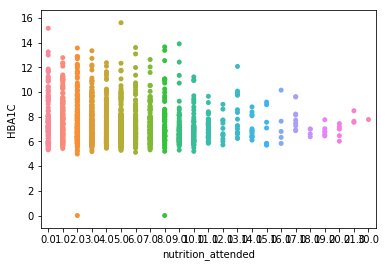

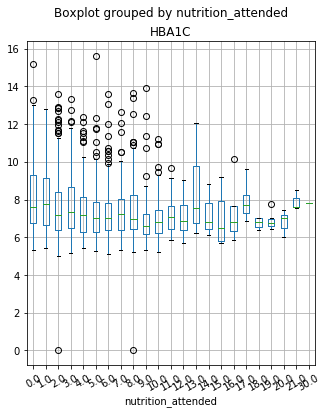

In [21]:
ax = sns.stripplot(x="nutrition_attended", y="HBA1C", data=df_corr)
df_corr.boxplot('HBA1C','nutrition_attended',rot = 30,figsize=(5,6))

This partial correlation and graphs show that the negative relationships is confirmed, however, the partial correlation is not high. The figures show that for those who attend more visits, the distribution of HbA1c level  tighter and lower than the range of distribution of the values for someone whose attendance is low.

Hypothesis 2: Among patients who had test results in the 12th month visit, the mean test result will be lower for patients with social support (1) than those without social support (value=0). 

In [22]:

patient_HbA1c_soc = pd.merge(left=lab_df_12months, right=psychol_df, how ='left', left_on=['IdPaciente'], right_on=['IdPaciente'])

patient_HbA1c_soc.info()

patient_HbA1c_soc['ApoyoSocialEmocional'] = patient_HbA1c_soc['ApoyoSocialEmocional'].fillna(0)
#patient_HbA1c_soc[['IdPaciente', 'ApoyoSocialEmocional']].head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1911 entries, 0 to 1910
Columns: 101 entries, IdLaboratorio to Sesion1
dtypes: datetime64[ns](3), float64(48), int64(4), object(46)
memory usage: 1.5+ MB


In [23]:
#Point Biserial Correlation when one is binary and the other is continuous variable: PBC
from scipy.stats import pointbiserialr
df_corr = pd.DataFrame(patient_HbA1c_soc,columns=['HBA1C','ApoyoSocialEmocional'])
hba1c = df_corr['HBA1C']
cat = df_corr['ApoyoSocialEmocional']
pbc = pointbiserialr(hba1c, cat)
print(pbc)

PointbiserialrResult(correlation=nan, pvalue=1.0)


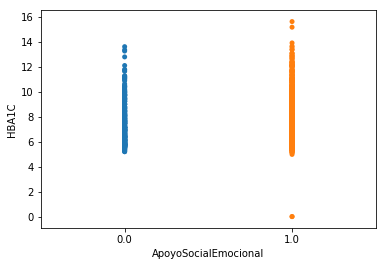

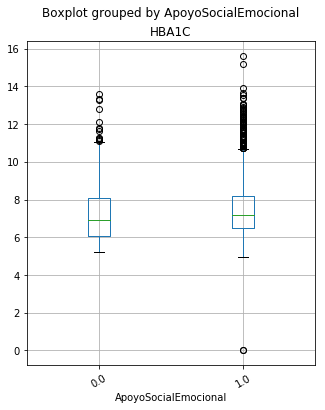

In [24]:
ax = sns.stripplot(x="ApoyoSocialEmocional", y="HBA1C", data=df_corr)
df_corr.boxplot('HBA1C','ApoyoSocialEmocional',rot = 30,figsize=(5,6))

ApoyoSocialEmocional
0.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: HBA1C, dtype: object

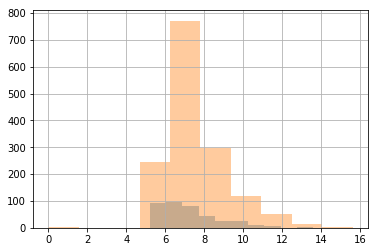

In [25]:
df_corr.groupby('ApoyoSocialEmocional').HBA1C.hist(alpha=0.4)

The partial Point Biserial Correlation and figures show there is not much difference in test results for those who indicated support or no support. 

Hypothesis 3: Those who indicate that they drink Refrescos might have higher HbA1c levels. 

In [26]:
filename = 'II Datos CMU (BAL).xlsx'
sheetname = 'nutricionvaloracioninicial'
nutri_init_assess_df = read_data_from_excel(filename,sheetname)
nutri_init_assess_df.head()

,IdValoracionNutricionalInicial,IdPaciente,Fecha,Hora,Usuario,QuienPreparaAlimentos,AlimentosDisgustan,EndulzanteUtilizado,AlteracionesDigestivas,AlteracionesDigestivasCuales,...,DistribucionCalorica,NotaNutricional,DietaPaciente,FactorActividad,Edad,IMC,Alcohol,AlcoholCantidad,Tabaco,TabacoCantidad
0,1,1,2012-11-01 00:00:00,10:04:00,d41d8cd98f00b204e9800998ecf8427e,SU SOBRINA,TODO LE GUSTA,SUSTITUTO DE AZUCAR,1.0,ESTREÑIMIENTO CRÓNICO,...,NaN,NaN,2012-11-01 00:00:00,1.2,86.0,24.382,ACTIVO,NaN,INACTIVO,HACE 25 AÑOS
1,2,2,2011-11-30 00:00:00,17:02:13,d41d8cd98f00b204e9800998ecf8427e,CONYUGE,"REPOLLO, CEBOLLA, TOMATE",SUSTITUTO DE AZUCAR,0.0,NaN,...,L(1)F(4)V(4)CE(12)LEG(1)AOA(8)GS(5),METADISMINUIR NIVEL DE GLUCOSA EN SANGRE Y TRI...,2011-11-30 00:00:00,1.2,41.0,33.515,ACTIVO,4 CERVEZAS POR SEMANA,ACTIVO,1 CIGARRO AL DIA DESDE HACE 10 AÑOS
2,3,3,2011-12-12 00:00:00,12:00:00,d41d8cd98f00b204e9800998ecf8427e,ELLA O EL ESPOSO,CARNE ROJA NI PESCADO,SUSTITUTO DE AZÚCAR,1.0,COLITIS/ ESTREÑIMIENTO/ DIARREA,...,NaN,NaN,NaN,1.2,69.0,25.521,AUSENTE,NaN,AUSENTE,NaN
3,4,4,2011-12-15 00:00:00,10:00:00,d41d8cd98f00b204e9800998ecf8427e,SU MAMÁ,"COLIFLOR, YOGURTH, PIÑA ACIDA Y FRESAS.",SUSTITUTO DE AZÚCAR,1.0,GASTRITIS EN EL AYUNO PROLONGADO,...,NaN,NaN,2011-12-15 00:00:00,1.2,36.0,39.730,ACTIVO,NaN,ACTIVO,NaN
4,5,5,2011-12-15 00:00:00,11:00:00,d41d8cd98f00b204e9800998ecf8427e,ESPOSA,PESCADO Y MARISCOS,SUSTITUTO DE AZÚCAR,1.0,A VECES GASES CUANDO COME MUCHO CONDIMENTO,...,L(1) F(5) V(5) CE (10) LEG(1) AOA (6) GS(6),NaN,2011-12-15 00:00:00,1.2,54.0,24.350,INACTIVO,ALCOHOLISMO QUE FUE TRATADO AA SUSPENDIDO EN 2005,AUSENTE,NaN


In [27]:
ref_df =nutri_init_assess_df[['IdPaciente', 'Refrescos', 'Fecha']]
ref_df.describe()

,IdPaciente,Refrescos
count,12780.000000,12770.000000
mean,7862.971518,0.795223
std,4249.196872,0.403554
min,0.000000,0.000000
25%,4520.750000,1.000000
50%,8061.500000,1.000000
75%,11476.250000,1.000000
max,15061.000000,1.000000


In [28]:
ref_df['Fecha'] = pd.to_datetime(ref_df['Fecha'], errors = 'coerce')
#ref_df['year'], ref_df['month'] = ref_df['Fecha'].dt.year, ref_df['Fecha'].dt.month

#duplicateRowsDF = ref_df[ref_df.duplicated('IdPaciente')]
#duplicateRowsDF.describe()
#print(duplicateRowsDF.sort_values('IdPaciente'))

#Keep the latest year of information: 
ref_df = ref_df.loc[ref_df.groupby('IdPaciente').Fecha.idxmax()]

ref_df.describe()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:9: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


,IdPaciente,Refrescos
count,12457.000000,12457.000000
mean,8017.767601,0.795296
std,4171.734254,0.403501
min,0.000000,0.000000
25%,4770.000000,1.000000
50%,8221.000000,1.000000
75%,11554.000000,1.000000
max,15061.000000,1.000000


In [29]:
patient_HbA1c_ref = pd.merge(left=lab_df_12months, right=ref_df, how ='left', left_on=['IdPaciente'], right_on=['IdPaciente'])
#patient_HbA1c_ref.info()

patient_HbA1c_ref['Refrescos'] = patient_HbA1c_ref['Refrescos'].fillna(0)
patient_HbA1c_ref.describe()

,IdLaboratorio,IdPaciente,Glucosa,HBA1C,Colesterol,Trigliceridos,HDL,VLDL,LDL,IA1,...,IdNotaBUN,IdNotaCreatininaSerica,IdNotaAlbuminaAzar,IdNotaCreatininaUrinaria,IdNotaMicroalbumina,IdPagoh,estatusLab,IdConsultorioLab,Unnamed: 53,Refrescos
count,1559.000000,1559.000000,1522.000000,1544.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,...,1420.0,1420.0,1420.0,1420.0,1420.0,1435.000000,1559.0,1559.0,0.0,1559.000000
mean,19705.753047,5289.427838,171.097898,7.528476,0.472518,0.676923,0.095266,0.135437,0.241946,0.013478,...,0.0,0.0,0.0,0.0,0.0,6173.641812,0.0,0.0,NaN,0.760744
std,6145.320625,2090.805493,77.490439,1.615908,9.274652,13.943170,1.895616,2.788852,4.750967,0.266450,...,0.0,0.0,0.0,0.0,0.0,1743.650211,0.0,0.0,NaN,0.426766
min,9122.000000,5.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,NaN,0.000000
25%,14892.000000,3849.000000,118.000000,6.390000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,4937.500000,0.0,0.0,NaN,1.000000
50%,19027.000000,5411.000000,149.000000,7.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,6213.000000,0.0,0.0,NaN,1.000000
75%,24314.500000,7026.000000,202.000000,8.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,7589.000000,0.0,0.0,NaN,1.000000
max,59075.000000,9088.000000,600.000000,15.620000,212.400000,401.300000,48.700000,80.000000,101.000000,6.100000,...,0.0,0.0,0.0,0.0,0.0,10671.000000,0.0,0.0,NaN,1.000000


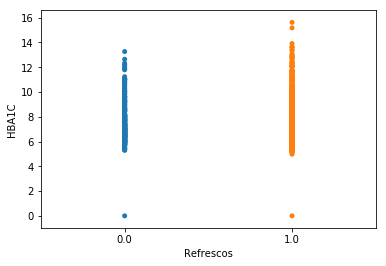

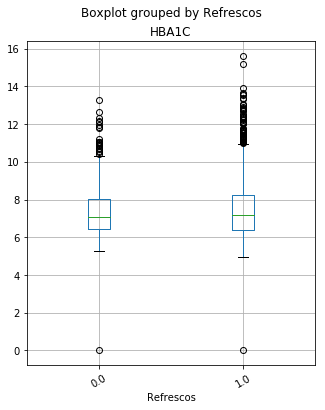

In [30]:
df_corr = pd.DataFrame(patient_HbA1c_ref,columns=['HBA1C','Refrescos'])

ax = sns.stripplot(x="Refrescos", y="HBA1C", data=df_corr)
df_corr.boxplot('HBA1C','Refrescos',rot = 30,figsize=(5,6))
#df_corr.groupby('Refrescos').hist()

Refrescos
0.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: HBA1C, dtype: object

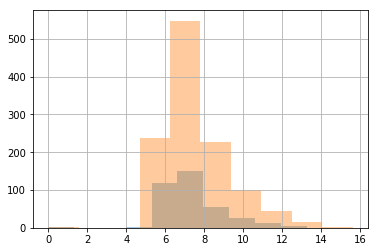

In [31]:
df_corr.groupby('Refrescos').HBA1C.hist(alpha=0.4)

In [32]:
# pbc of first question
hba1c = df_corr['HBA1C']
cat = df_corr['Refrescos']
pbc = pointbiserialr(cat, hba1c)
print(pbc)

PointbiserialrResult(correlation=nan, pvalue=1.0)


The graphs show for these two groups (those who drink refrescos and those who don't), there is no apparent differences. 